## Assignment 6 - Helper Functions

In [1]:
%pylab inline
%matplotlib inline 

# (c) 2014 Reid Johnson and Everaldo Aguiar
#
# Functions to work with continuous data and linear regression models.

import matplotlib.pyplot as pl

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                # Speed improvement provided by Guankun Mu (gkmu)
                for name in data[classes].drop_duplicates(keep='first'):
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                #t = plt.title(name)
            i += 1

    pl.show()

Populating the interactive namespace from numpy and matplotlib


-----------------------

### Assignment 6

Graphs of the data relationships and linear regression models with relevant statistics:

In [2]:
# Data import
import pandas as pd
fileURL = 'http://archive.ics.uci.edu/ml/\
machine-learning-databases/iris/iris.data'
iris = pd.read_csv(fileURL, names=['Sepal_Length', 'Sepal_Width',
                                   'Petal_Length', 'Petal_Width',
                                   'Species'], header=None)
iris = iris.dropna()

Pairwise scatterplot graphs.  Petal Length and Petal Width appear to have the closest linear relationship:

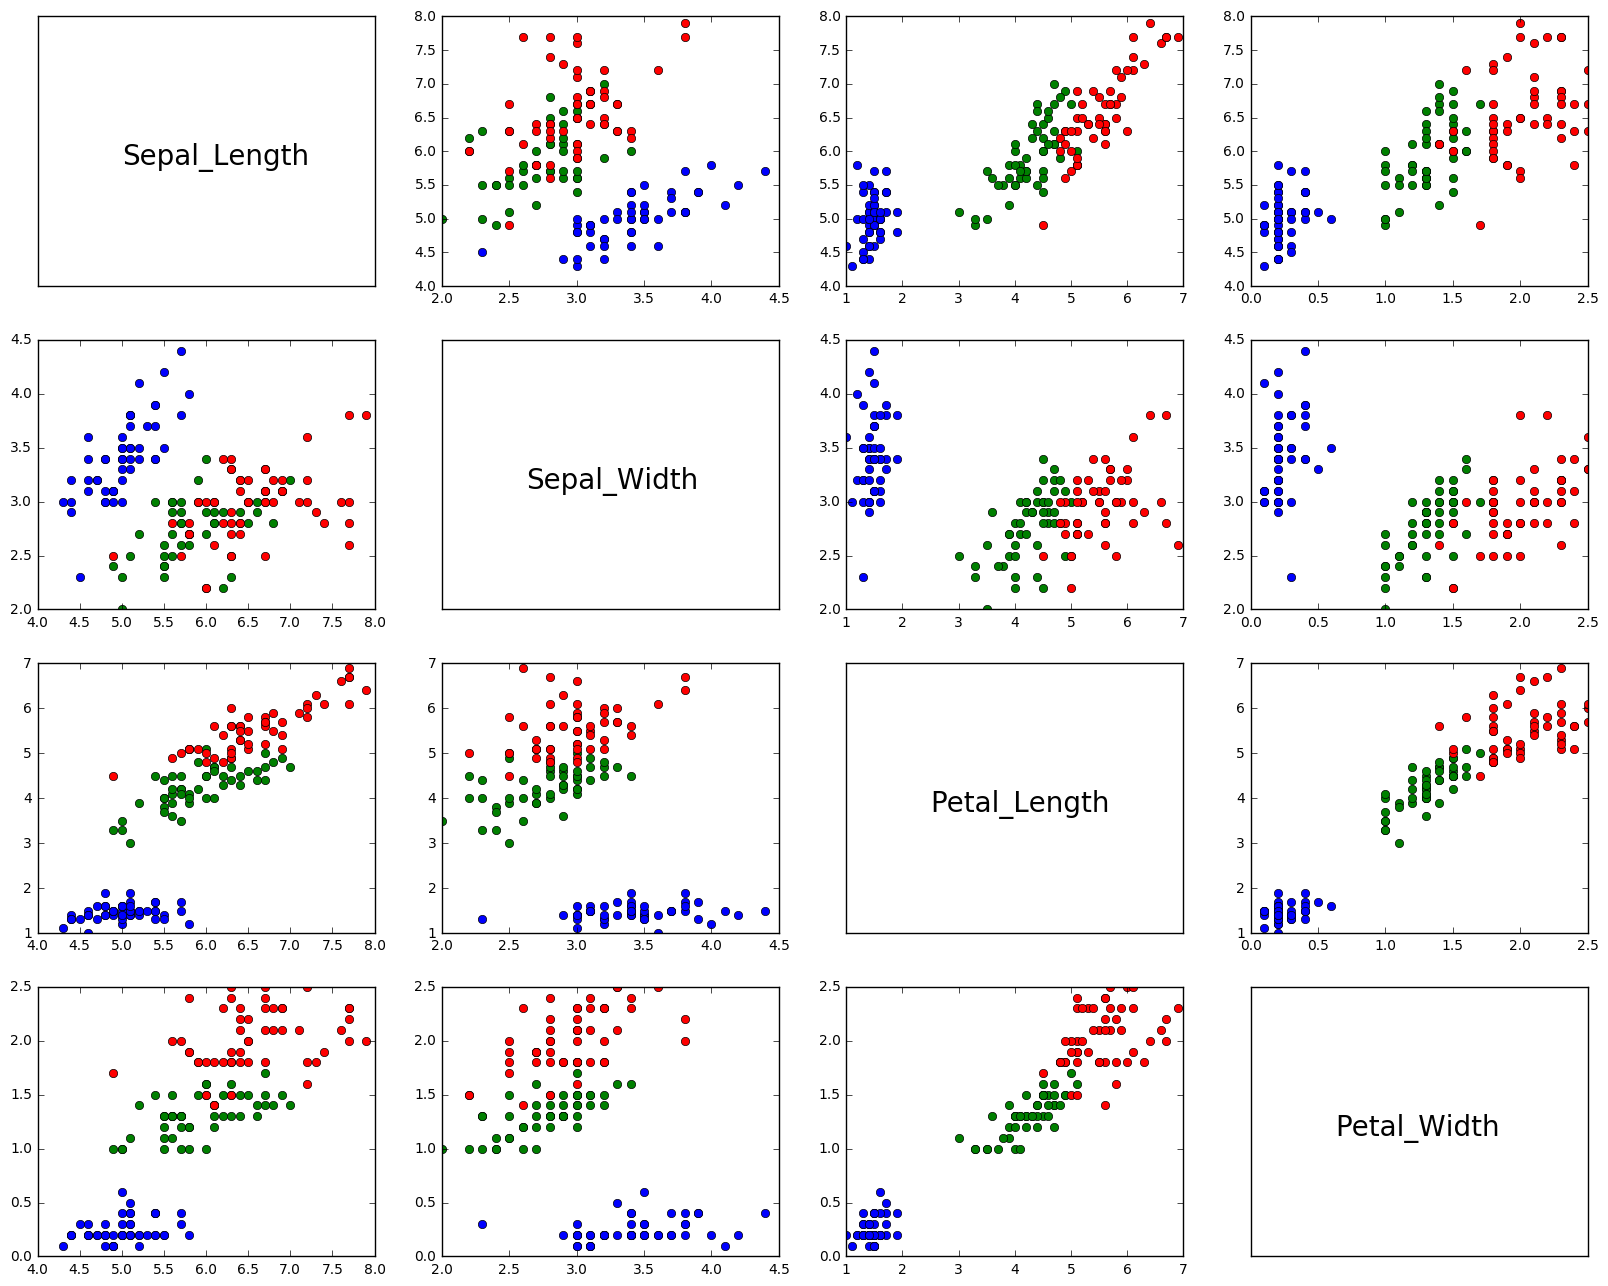

In [3]:
pairs(iris)

Linear regression models:

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def _compute_linreg(x_train, x_test, y_train, y_test):
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(x_train, y_train)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % np.mean((regr.predict(x_test) - y_test) ** 2))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(x_test, y_test))
    
    return regr

# Methods are broken up by dimensions here simply for the sake of simplicity due to differences
# in what graphs are generated as well as issues involving 1D vs n-D arrays and how numpy complains 
# about their format.

def linreg_iris_2D(data, y_label, x_label, rseed=100):
    data_train, data_test = model_selection.train_test_split(data, random_state=rseed, test_size=0.13)

    # Split the data into training/testing sets
    iris_x_train = data_train[x_label].values.reshape(-1, 1)
    iris_x_test  = data_test[x_label].values.reshape(-1, 1)

    # Split the targets into training/testing sets
    iris_y_train = data_train[y_label].values.reshape(-1, 1)
    iris_y_test = data_test[y_label].values.reshape(-1, 1)

    regr = _compute_linreg(iris_x_train, iris_x_test, iris_y_train, iris_y_test)

    # Plot outputs
    plt.scatter(iris_x_test, iris_y_test,  color='black')
    plt.plot(iris_x_test, regr.predict(iris_x_test), color='blue',
             linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

def linreg_iris_3D(data, y_label, x1_label, x2_label, rseed=100):
    data_train, data_test = model_selection.train_test_split(data, random_state=rseed, test_size=0.13)

    # Split the data into training/testing sets
    iris_x_train = np.array([np.array(data_train[x1_label]), np.array(data_train[x2_label])]).transpose()
    iris_x_test = np.array([np.array(data_test[x1_label]), np.array(data_test[x2_label])]).transpose()

    # Split the targets into training/testing sets
    iris_y_train = data_train[y_label].values.reshape(-1, 1)
    iris_y_test = data_test[y_label].values.reshape(-1, 1)

    regr = _compute_linreg(iris_x_train, iris_x_test, iris_y_train, iris_y_test)

    x_test_sorted = np.sort(iris_x_test, axis=0)
    x1, x2 = np.meshgrid(x_test_sorted[:, 0], x_test_sorted[:, 1])
    
    # Plot outputs
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.scatter(iris_x_test[:, 0], iris_x_test[:, 1], iris_y_test, color='green')
    ax.plot_surface(x1, x2, regr.predict(x_test_sorted),
                      linewidth=0.2, antialiased=True)
    plt.show()

def linreg_iris_4D(data, column_predicted, rseed=100):
    data_train, data_test = model_selection.train_test_split(data[data.columns.difference(['Species'])], 
                                                             random_state=rseed, test_size=0.13)
    iris_x_train = np.array(data_train[data_train.columns.difference([column_predicted])])
    iris_x_test = np.array(data_test[data_test.columns.difference([column_predicted])])

    iris_y_train = np.array(data_train[column_predicted])
    iris_y_test = np.array(data_test[column_predicted])
    
    regr = _compute_linreg(iris_x_train, iris_x_test, iris_y_train, iris_y_test)

Simple linear regression models:

Sepal_Length against Sepal_Width:
Coefficients: 
 [[-0.08097383]]
Mean squared error: 0.96
Variance score: -0.05


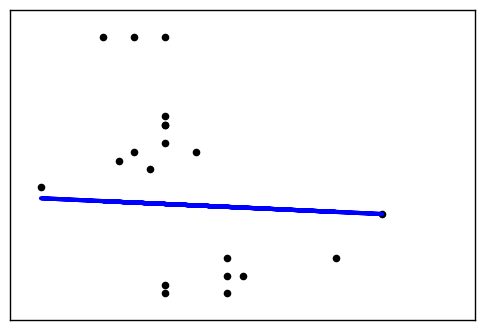

Sepal_Length against Petal_Length:
Coefficients: 
 [[ 0.40004982]]
Mean squared error: 0.15
Variance score: 0.83


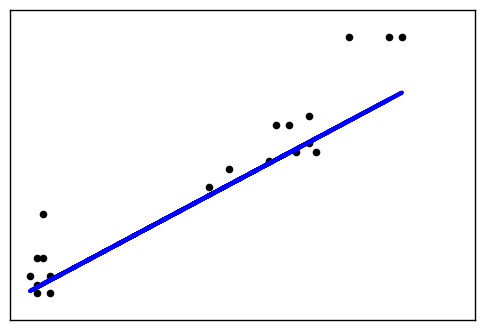

Sepal_Length against Petal_Width:
Coefficients: 
 [[ 0.86050575]]
Mean squared error: 0.22
Variance score: 0.76


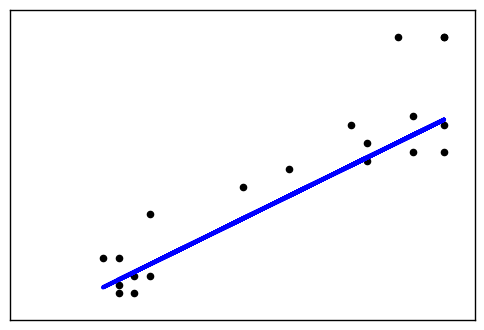

Sepal_Width against Sepal_Length:
Coefficients: 
 [[-0.02284524]]
Mean squared error: 0.23
Variance score: 0.01


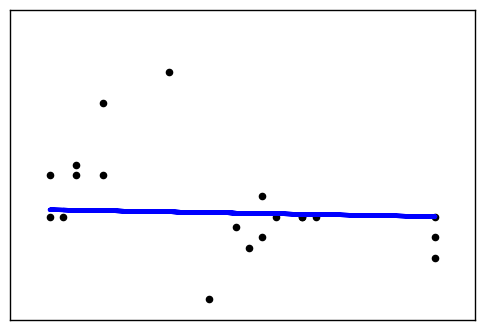

Sepal_Width against Petal_Length:
Coefficients: 
 [[-0.09416292]]
Mean squared error: 0.16
Variance score: 0.31


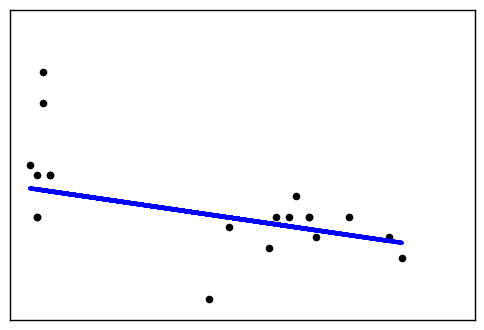

Sepal_Width against Petal_Width:
Coefficients: 
 [[-0.18232523]]
Mean squared error: 0.18
Variance score: 0.22


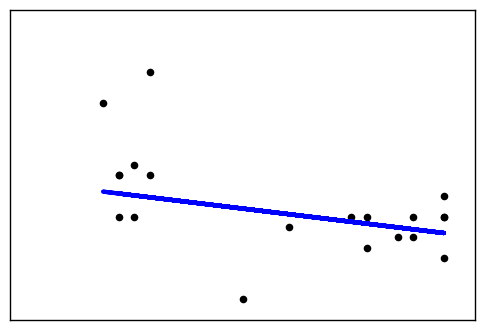

Petal_Length against Sepal_Length:
Coefficients: 
 [[ 1.84466242]]
Mean squared error: 0.61
Variance score: 0.85


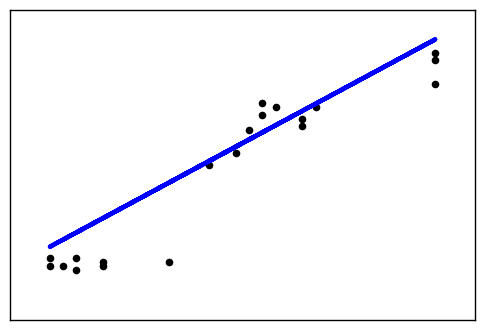

Petal_Length against Sepal_Width:
Coefficients: 
 [[-1.53897522]]
Mean squared error: 2.87
Variance score: 0.31


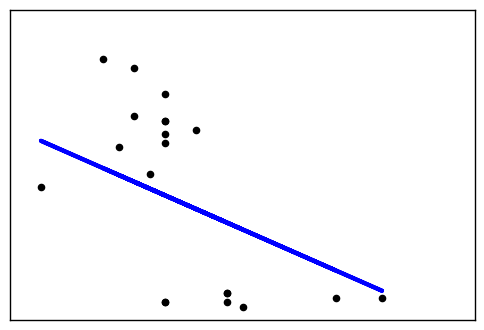

Petal_Length against Petal_Width:
Coefficients: 
 [[ 2.21802703]]
Mean squared error: 0.27
Variance score: 0.94


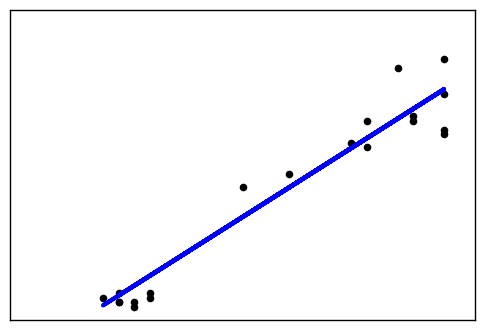

Petal_Width against Sepal_Length:
Coefficients: 
 [[ 0.74602124]]
Mean squared error: 0.16
Variance score: 0.79


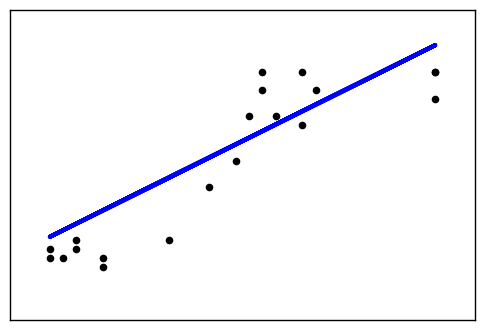

Petal_Width against Sepal_Width:
Coefficients: 
 [[-0.56026447]]
Mean squared error: 0.58
Variance score: 0.23


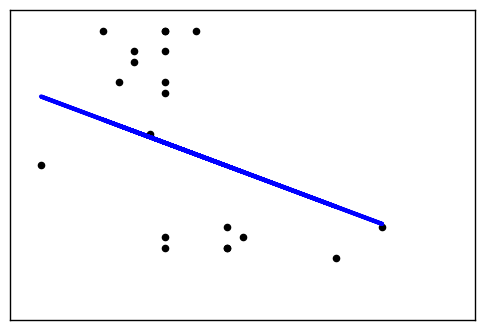

Petal_Width against Petal_Length:
Coefficients: 
 [[ 0.41702436]]
Mean squared error: 0.05
Variance score: 0.94


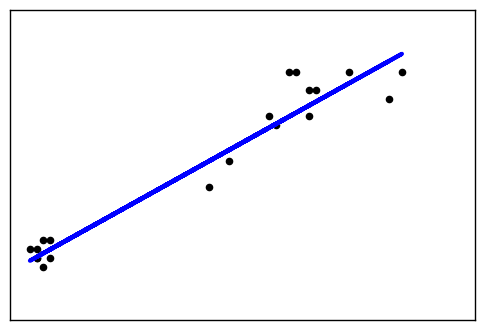

In [5]:
for y in iris.columns[:-1]:
    for x in iris.columns[:-1]:
        if x == y:
            continue
        print(str(y) + ' against ' + str(x) + ':')
        linreg_iris_2D(iris, y, x)

Multiple linear regression models:

Sepal_Length against Sepal_Width, Petal_Length:
Coefficients: 
 [[ 0.62530924  0.45893076]]
Mean squared error: 0.13
Variance score: 0.85


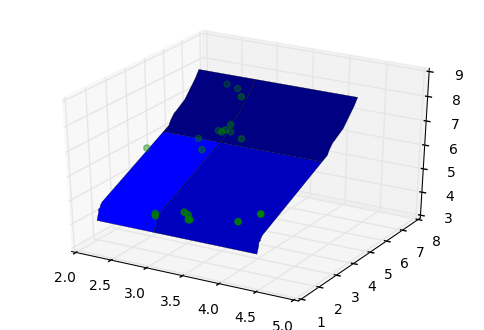

Sepal_Length against Sepal_Width, Petal_Width:
Coefficients: 
 [[ 0.44677522  0.94196415]]
Mean squared error: 0.24
Variance score: 0.74


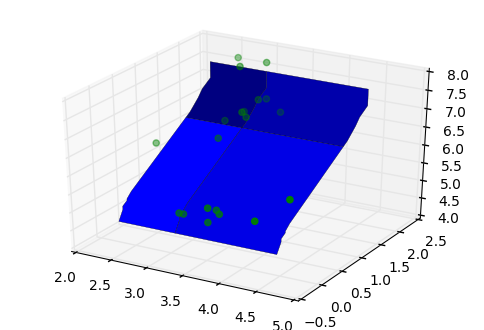

Sepal_Length against Petal_Length, Petal_Width:
Coefficients: 
 [[ 0.54909597 -0.35740395]]
Mean squared error: 0.16
Variance score: 0.83


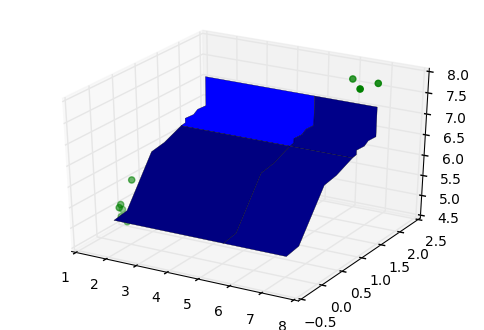

Sepal_Width against Sepal_Length, Petal_Length:
Coefficients: 
 [[ 0.57568213 -0.32446445]]
Mean squared error: 0.14
Variance score: 0.42


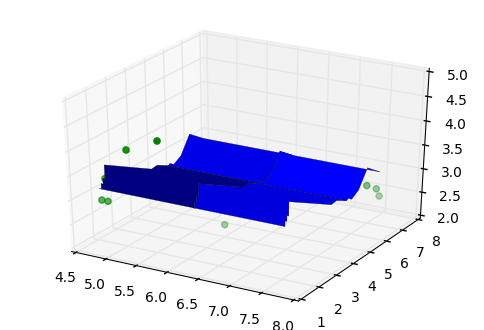

Sepal_Width against Sepal_Length, Petal_Width:
Coefficients: 
 [[ 0.31608717 -0.45432006]]
Mean squared error: 0.19
Variance score: 0.18


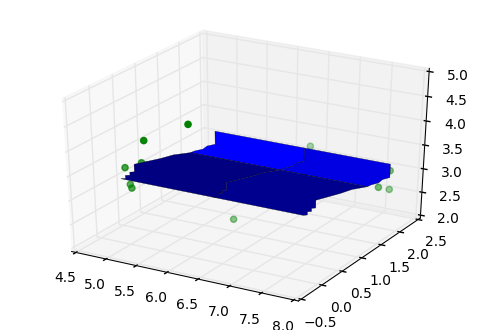

Sepal_Width against Petal_Length, Petal_Width:
Coefficients: 
 [[-0.24162561  0.3536069 ]]
Mean squared error: 0.15
Variance score: 0.36


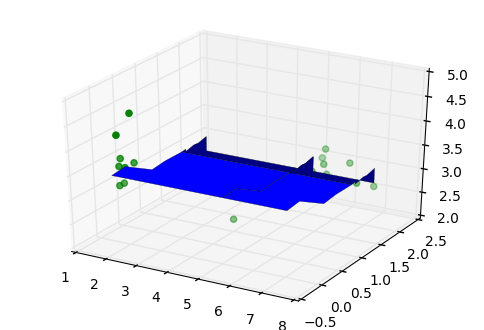

Petal_Length against Sepal_Length, Sepal_Width:
Coefficients: 
 [[ 1.8128577 -1.3921812]]
Mean squared error: 0.38
Variance score: 0.91


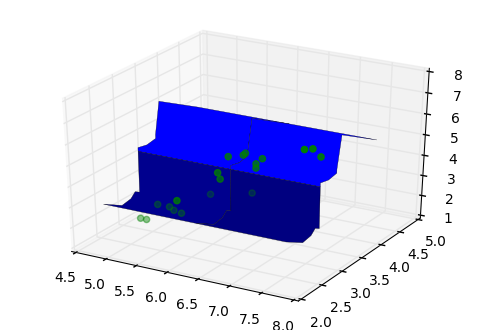

Petal_Length against Sepal_Length, Petal_Width:
Coefficients: 
 [[ 0.53056862  1.76146968]]
Mean squared error: 0.19
Variance score: 0.95


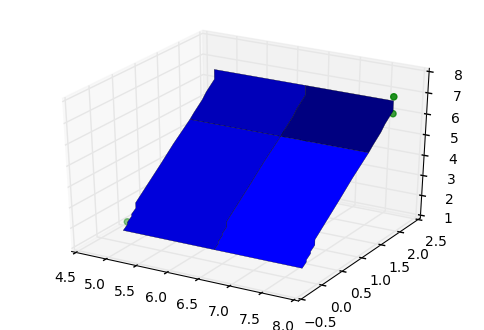

Petal_Length against Sepal_Width, Petal_Width:
Coefficients: 
 [[-0.33000344  2.15785908]]
Mean squared error: 0.22
Variance score: 0.95


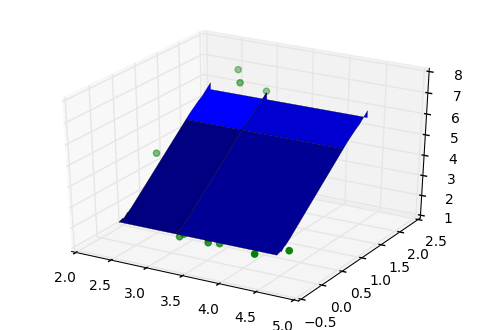

Petal_Width against Sepal_Length, Sepal_Width:
Coefficients: 
 [[ 0.73458074 -0.50078266]]
Mean squared error: 0.14
Variance score: 0.82


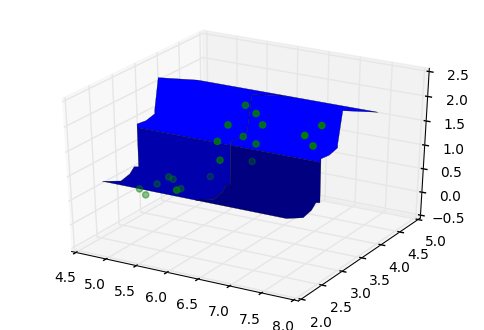

Petal_Width against Sepal_Length, Petal_Length:
Coefficients: 
 [[-0.08871793  0.45251595]]
Mean squared error: 0.05
Variance score: 0.93


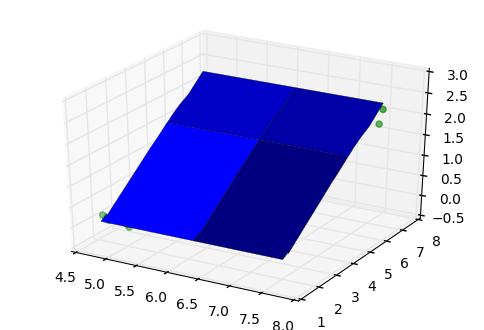

Petal_Width against Sepal_Width, Petal_Length:
Coefficients: 
 [[ 0.09534213  0.42600205]]
Mean squared error: 0.05
Variance score: 0.94


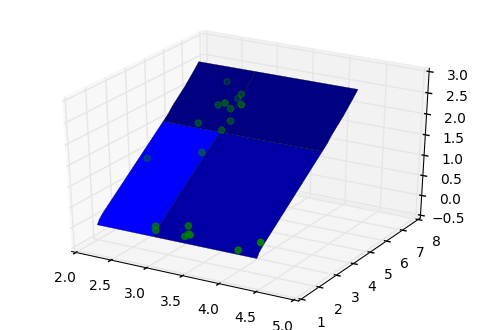

In [6]:
# Use 2 other features
for y in iris.columns[:-1]:
    for x1 in iris.columns[:-1]:
        for x2 in iris.columns[iris.columns.get_loc(x1)+1:-1]:
            if y == x1 or y == x2:
                continue
            print(str(y) + ' against ' + str(x1) + ', ' + str(x2) + ':')
            linreg_iris_3D(iris, y, x1, x2)

In [7]:
# Use 3 other features
for x in iris.columns[:-1]:
    print(str(x) + ' against all:')
    linreg_iris_4D(iris, x)

Sepal_Length against all:
Coefficients: 
 [ 0.71397905 -0.59870204  0.68239076]
Mean squared error: 0.13
Variance score: 0.86
Sepal_Width against all:
Coefficients: 
 [-0.58587158  0.57767496  0.62693225]
Mean squared error: 0.12
Variance score: 0.47
Petal_Length against all:
Coefficients: 
 [ 1.46148433  0.73927946 -0.66029519]
Mean squared error: 0.12
Variance score: 0.97
Petal_Width against all:
Coefficients: 
 [ 0.52897468 -0.22437508  0.23564594]
Mean squared error: 0.05
Variance score: 0.94


The best overall linear regression model was that of Petal Length versus all other features.  Its R^2 is the highest while still maintaining a relatively low mean squared error.  Using R^2 as a measure of quality here is acceptable since all models use the same dataset as a source of data values and don't do any transformations on it.  In this case The MSE is 0.12 and the R^2 is 0.97.

The best linear regression model for a pair of features is between Petal Length and Petal Width.

Removing the best predicted feature based upon other features (Petal Length) will have a minimal effect on classification performance.  Since most of the information about Petal Length is already available in the other features based on the R^2 value of its linear regression against all other features (around 0.97), the final classification should still be nearly as good.  Dimensionality reduction techniques would likely pick up on this.